In [3]:
import pandas as pd

# Load the CSV
news_df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')

# Parse datetime with mixed formats and timezones
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce', utc=True)

# Drop rows where parsing failed
news_df = news_df.dropna(subset=['date'])

# Extract date only (remove time)
news_df['date'] = news_df['date'].dt.date

# Optional: Check result
print(news_df[['date']].head())

         date
0  2020-06-05
1  2020-06-03
2  2020-05-26
3  2020-05-22
4  2020-05-22


In [9]:
stock_df = pd.read_csv('../data/raw/yfinance_data/AAPL_historical_data.csv')
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

In [10]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # ranges from -1 to 1

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)


In [12]:
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['Date', 'Avg_Sentiment']

In [13]:
stock_df['Daily_Return'] = stock_df['Close'].pct_change()
stock_df = stock_df[['Date', 'Daily_Return']]

In [14]:
combined_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')

In [15]:
correlation = combined_df['Avg_Sentiment'].corr(combined_df['Daily_Return'])
print("Pearson Correlation:", correlation)

Pearson Correlation: 0.04545335598164049


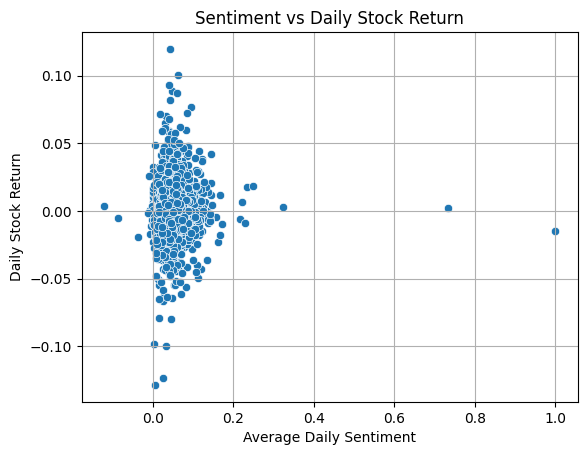

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Avg_Sentiment', y='Daily_Return', data=combined_df)
plt.title('Sentiment vs Daily Stock Return')
plt.xlabel('Average Daily Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show()